170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
782/782 [==============================] - 15s 14ms/step - loss: 1.8635 - accuracy: 0.3390 - val_loss: 1.4941 - val_accuracy: 0.4790
Epoch 2/50
782/782 [==============================] - 10s 13ms/step - loss: 1.5017 - accuracy: 0.4728 - val_loss: 1.3600 - val_accuracy: 0.5275
Epoch 3/50
782/782 [==============================] - 10s 13ms/step - loss: 1.3955 - accuracy: 0.5086 - val_loss: 1.3028 - val_accuracy: 0.5443
Epoch 4/50
782/782 [==============================] - 10s 13ms/step - loss: 1.3346 - accuracy: 0.5338 - val_loss: 1.2609 - val_accuracy: 0.5594
Epoch 5/50
782/782 [==============================] - 11s 14ms/step - loss: 1.2947 - accuracy: 0.5469 - val_loss: 1.2359 - val_accuracy: 0.5678
Epoch 6/50
782/782 [==============================] - 11s 14ms/step - loss: 1.2586 - accuracy: 0.5597 - val_loss: 1.2147 - val_ac

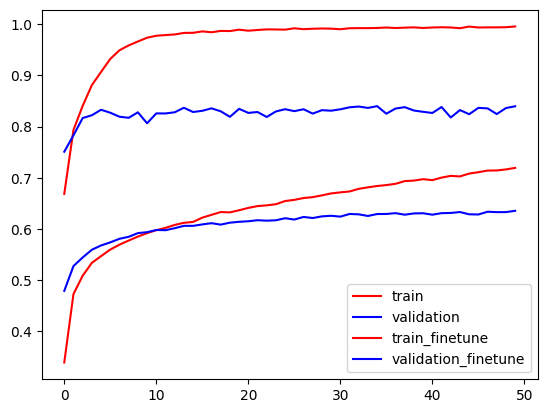

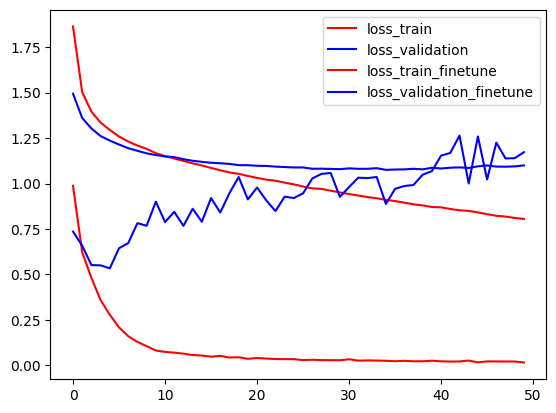

In [2]:
#question-2
import tensorflow as tf
from keras import datasets,Sequential
from keras.applications import VGG16
from keras.layers import Dense,Flatten,Input,Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(xtr,ytr),(xt,yt)=datasets.cifar10.load_data()
print(xtr.shape)
xtr=xtr/255.0
xt=xt/255.0
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(xtr);
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in vgg16_base.layers:
    layer.trainable = False
inputs=Input(shape=(32,32,3))
x=vgg16_base(inputs,training=False)
x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.1)(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.1)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1=model.fit(xtr, ytr, epochs=50, validation_data=(xt, yt),batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(xt ,yt)
print(f'\nTest accuracy: {test_acc}')
print("fine tune")
vgg16_base.trainable=True
print(len(vgg16_base.layers))
fine_tune_at=8
for layer in vgg16_base.layers[:fine_tune_at]:
  layer.trainable=False

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2=model.fit(xtr, ytr, epochs=50, validation_data=(xt, yt),batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(xt ,yt)
print(f'\nTest accuracy: {test_acc}')

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.plot(history2.history['accuracy'],color='red',label='train_finetune')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation_finetune')
plt.legend()
plt.show()
plt.plot(history1.history['loss'],color='red',label='loss_train')
plt.plot(history1.history['val_loss'],color='blue',label='loss_validation')
plt.plot(history2.history['loss'],color='red',label='loss_train_finetune')
plt.plot(history2.history['val_loss'],color='blue',label='loss_validation_finetune')
plt.legend()
plt.show()